Getting to know more about the objects used in [this ResNet for MNIST with pytorch](https://www.kaggle.com/readilen/resnet-for-mnist-with-pytorch?scriptVersionId=6942243) kaggle notebook in order to be able to replicate it with a different dataset.

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torchvision.datasets import MNIST
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import create_train_test_mnist as mnist
from resnet import conv3x3, ResidualBlock, ResNet

In [37]:
x_data, y_data = mnist.mnist_data()
features_train, features_test, targets_train, targets_test = mnist.divide_train_test(x_data, y_data, 0.2)

batch_size = 100
n_iters = 2500
num_epochs = n_iters/ (len(features_train) / batch_size)
num_epocs = int(num_epochs)

train, test = mnist.create_TensorDataset(features_train, targets_train, features_test, targets_test)
train_loader, test_loader = mnist.create_DataLoader(train, test, batch_size)


In [4]:
type(train)

torch.utils.data.dataset.TensorDataset

In [5]:
 for i, (images, labels) in enumerate(train_loader):
        train  = Variable(images.resize_(batch_size, 1, 32, 32))
        labels = Variable(labels)

In [6]:
train_loader.dataset

In [7]:
type(train)

torch.Tensor

### Testing functions and methods
***

In [8]:
# BatchNorm2d doc's example
m = nn.BatchNorm2d(100)
inputs = torch.randn(20, 100, 35, 45)
output = m(inputs)
output.shape

torch.Size([20, 100, 35, 45])

***

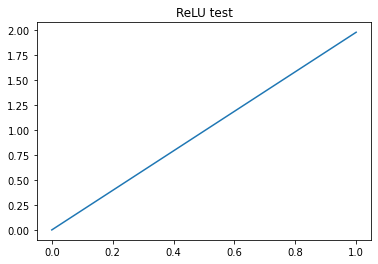

In [9]:
# ReLU doc's exemples

m = nn.ReLU()
inputs = torch.randn(2)
output = m(inputs)
plt.plot(output)
plt.title("ReLU test")
plt.show()

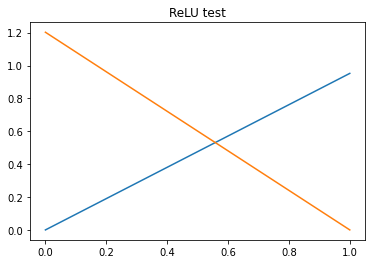

In [10]:
m = nn.ReLU()
inputs = torch.randn(2).unsqueeze(0)
output = torch.cat((m(inputs), m(-inputs)))
plt.plot(output)
plt.title("ReLU test")
plt.show()

***

#### nn Module class:

When making ResidualBlock and ResNet classes, it was used the nn class Module, a base class for all neural network modules. 
Since we use nn.Sequential, you must define a foward method in the object created.

In [11]:
net_args = {
    "block": ResidualBlock,
    "layers": [2,2,2,2]
}

model = ResNet(**net_args)

***

In [12]:
print(f'model.conv:\n')
print(f'Type: {type(model.conv)}')
print(f'About layer:')
print(f'in_channels: {model.conv.in_channels}')
print(f'out_channels: {model.conv.out_channels}')
print(f'kernel_size: {model.conv.kernel_size}')
print(f'stride: {model.conv.stride}')
print(f'padding: {model.conv.padding}')

model.conv:

Type: <class 'torch.nn.modules.conv.Conv2d'>
About layer:
in_channels: 1
out_channels: 16
kernel_size: (3, 3)
stride: (1, 1)
padding: (1, 1)


When initializing model:

After in_channels being set to 16, `self.conv = conv3x3(1,16)` happens. When `conv3x3` is called, it returns a Conv2d object. With the function, you're able to specify the number of in_channels, out_channels and the stride. If the stride isn't specified, it'll automatically be 1. When we initialized conv3x3(1,16), we created a Cpnv2d object with in_channels = 1 and out_channels = 2, as shown in the cell above.

In [13]:
model.conv.forward(train).shape

torch.Size([100, 16, 32, 32])

In [26]:
test_zeros

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

***

In [14]:
print(f'model.bn:\n')
print(f'Type: {type(model.bn)}')
print(f'About layer:')
print(f'num_features: {model.bn.num_features}')
print(f'eps: {model.bn.eps}')
print(f'momentum: {model.bn.momentum}')
print(f'affine: {model.bn.affine}')
print(f'track_running_stats: {model.bn.track_running_stats}')
print(f'weight: {model.bn.weight}\n')
print(f'bias: {model.bn.bias}\n')

model.bn:

Type: <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
About layer:
num_features: 16
eps: 1e-05
momentum: 0.1
affine: True
track_running_stats: True
weight: Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True)

bias: Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)



In [15]:
type(model.bn.weight)

torch.nn.parameter.Parameter

After that, `self.bn = nn.BatchNorm2d(16)`. Here we specifiy that the num_features will be 16. The affine is set to `True`, therefore it has learnable affine parameters (unsure of what that means). It creates a Tensor the size of num_features (which is 16). The  momentum, as specified by the [source](https://pytorch.org/docs/master/_modules/torch/nn/modules/batchnorm.html#BatchNorm2d) is the value used for the running_mean and running_var computation. 

*
<!--         self.in_channels = 16
        self.conv = conv3x3(1, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[0], 2)
        self.layer3 = self.make_layer(block, 64, layers[1], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes) -->

In [46]:
error = nn.CrossEntropyLoss()
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_list = []
iteration_list = []
accuracy_list = []
count = 0
num_epochs = 5

for epoch in range(num_epochs):
    print(f'epoch {epoch} out of {num_epochs}')
    for i, (images, labels) in enumerate(train_loader):                  
        stop = int(input("0 to continue, 1 to stop"))
        train  = Variable(images.resize_(batch_size, 1, 32, 32))
        labels = Variable(labels)           
        
        # Forward propagation
        outputs = model(train)      
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)   
        
        # Calculating gradients
        loss.backward()   
        
        # Update parameters
        optimizer.step()  
        
        
        stop = int(input("0 to continue, 1 to stop"))
        if stop == 1:
            break
        elif stop == 2:
            print("Train:", train[:1])
            print("Outputs type:", type(outputs))
            print("Loss type:", type(loss))
            print("Optimizer type:", type(optimizer))
            print("Count:", count)

        
        count += 1      
        if count % 20 == 0:
            correct = 0
            total = 0

            for images, labels in test_loader:
                images = Variable(images.resize_(batch_size, 1, 32, 32))                
                outputs = model(images)                
                predicted = torch.max(outputs.data, 1)[1]                
                total += labels.size(0)              
                correct += (predicted == labels).sum()         
            
            accuracy = 100 * correct / float(total)           

            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

epoch 0 out of 5
0 to continue, 1 to stop2
0 to continue, 1 to stop2
Train: tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.2471],
          [0.9216, 0.8706, 0.4863,  ..., 0.2784, 0.3961, 0.8235]]]])
Outputs type: <class 'torch.Tensor'>
Loss type: <class 'torch.Tensor'>
Optimizer type: <class 'torch.optim.adam.Adam'>
Count: 0
0 to continue, 1 to stop2
0 to continue, 1 to stop2
Train: tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0